In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
data = pd.read_csv("/home/brandon/Omdena/Omdena Radamol/Project Data/CRC_original_dataset.csv")
from IPython.core.display import display, HTML

import pandas_bokeh
pandas_bokeh.output_notebook()



/home/brandon/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (24,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Loading BokehJS ...

In [37]:
display(HTML('<h1><center>CRC Dashboard using Voila</center></h1>'))


In [38]:
display(HTML('<p><h3><center>This is a basic dashboard to high light features of the Colorectal Dataset with Dataframe</p></h3></center>'))


In [39]:
#Function for cleaning a dataset from NaN, Inf, and missing data
def clean_dataset(df):
    assert isinstance(data, pd.DataFrame), "df needs to be a pd.DataFrame"
    data.fillna(0, inplace=True)
    indices_to_keep = ~data.isin([np.nan, np.inf, -np.inf]).any(1)
    return data[indices_to_keep].astype(np.float64)

In [40]:
#Feature Extraction of top 20 features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data.iloc[:,0:20]  
y = data.iloc[:,-1]

In [41]:
data.head()

,Unnamed: 0,abd_tend_score,PR_score,age_group,Case_Control,code_D11_1st,code_D11_2nd,code_D12_1st,code_D12_2nd,code_T03_1st,...,diarrhoea_last_year,earliest_rectal_bleeding,rectal_bleeding_last_year,earliest_mild_anaemia,mild_anaemia_last_year,earliest_severe_anaemia,severe_anaemia_last_year,earliest_FOB,FOB_last_year,diarrhoea_duration
0,0,0.0,0.0,1.0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,22.0
1,1,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2,2,0.0,0.0,2.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
3,3,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
4,4,0.0,0.0,2.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [42]:
# Replace infinite updated data with nan
data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
data.fillna(0, inplace=True)

In [43]:
#Extracts Features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)

In [44]:
#Scores each feature
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [45]:
display(HTML('<p><h3><center>Feature Scores</center></h3></p>'))


In [46]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [47]:
featureScores

,Specs,Score
0,Unnamed: 0,37698.608650
1,abd_tend_score,186.484382
2,PR_score,792.877476
3,age_group,9.547794
4,Case_Control,191.448419
...,...,...
15,code_D16_1st,156.523950
16,code_D16_2nd,222.390054
17,haemoglobin_3_categories,170.329937
18,patientid,115643.937269


In [48]:
#Top 20 Features
print(featureScores.nlargest(20,'Score'))

                       Specs          Score
18                 patientid  115643.937269
0                 Unnamed: 0   37698.608650
19                group_code    9688.461251
6               code_D11_2nd    1989.000000
14  abdominal_pain_frequency     848.692601
2                   PR_score     792.877476
5               code_D11_1st     552.919606
12              code_T08_2nd     287.320142
10              code_T03_2nd     272.766022
11              code_T08_1st     224.751971
16              code_D16_2nd     222.390054
13            abdominal_pain     209.749717
9               code_T03_1st     203.843976
4               Case_Control     191.448419
1             abd_tend_score     186.484382
17  haemoglobin_3_categories     170.329937
15              code_D16_1st     156.523950
8               code_D12_2nd     120.154047
7               code_D12_1st     105.953738
3                  age_group       9.547794


In [49]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [50]:
#Feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot_bokeh(kind='barh', figsize=(20, 20))
plt.show()

In [51]:
display(HTML('<p><h3><center>Annotated Heatmap of Top 20 Features</center></h3></p>'))


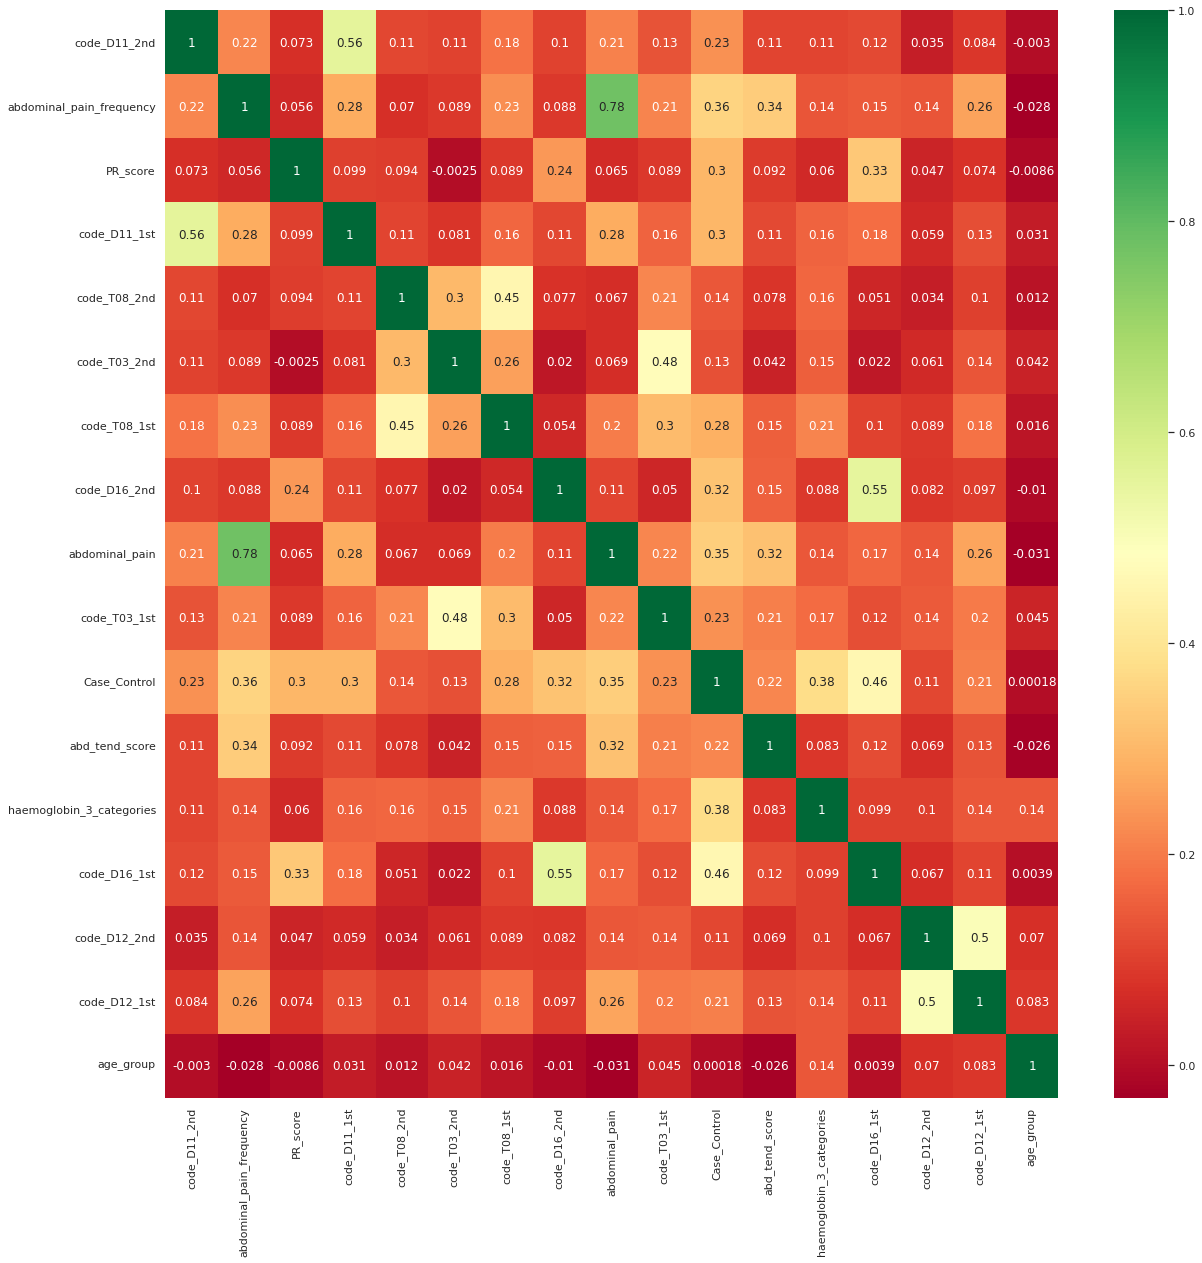

In [52]:
import seaborn as sns
corrmat = data.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(data[['code_D11_2nd', 'abdominal_pain_frequency', 'PR_score', 'code_D11_1st', 'code_T08_2nd', 'code_T03_2nd', 'code_T08_1st', 'code_D16_2nd', 'abdominal_pain', 'code_T03_1st', 'Case_Control', 'abd_tend_score', 'haemoglobin_3_categories', 'code_D16_1st', 'code_D12_2nd', 'code_D12_1st', 'age_group'   ]].corr(),annot=True,cmap="RdYlGn")

In [53]:
display(HTML('<p><h3><center>Subplots for patient age, pain frequency, random variables, and cancer status</center></h3></p>'))


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

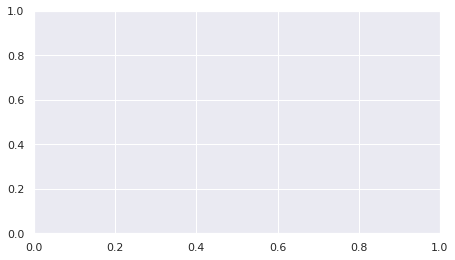

In [54]:
plt.subplot(221)

data['age_group'].value_counts().plot_bokeh(kind='bar', title='Age of patients', figsize=(20,20))

plt.xticks(rotation=0)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

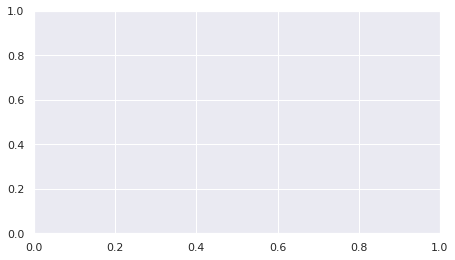

In [55]:
plt.subplot(222)

data['abdominal_pain_frequency'].value_counts().plot_bokeh(kind='bar', title='Abdominal Pain Frequency')

plt.xticks(rotation=0)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

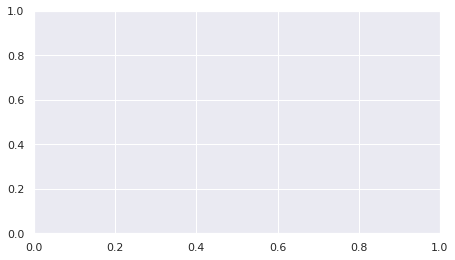

In [56]:
plt.subplot(223)

data['code_D11_2nd'].value_counts().plot_bokeh(kind='bar', title='Random Variable at')

plt.xticks(rotation=0)

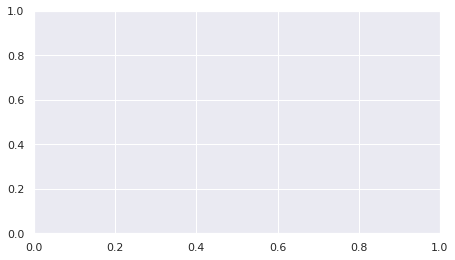

In [73]:
plt.subplot(224)

data['Case_Control'].value_counts().plot_bokeh(kind='bar', title='Were Cancerous')

plt.xticks(rotation=0)

plt.show()

In [58]:
display(HTML('<p><h3><center>Distribution of diagnosis vs. age</center></h3></p>'))


/home/brandon/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

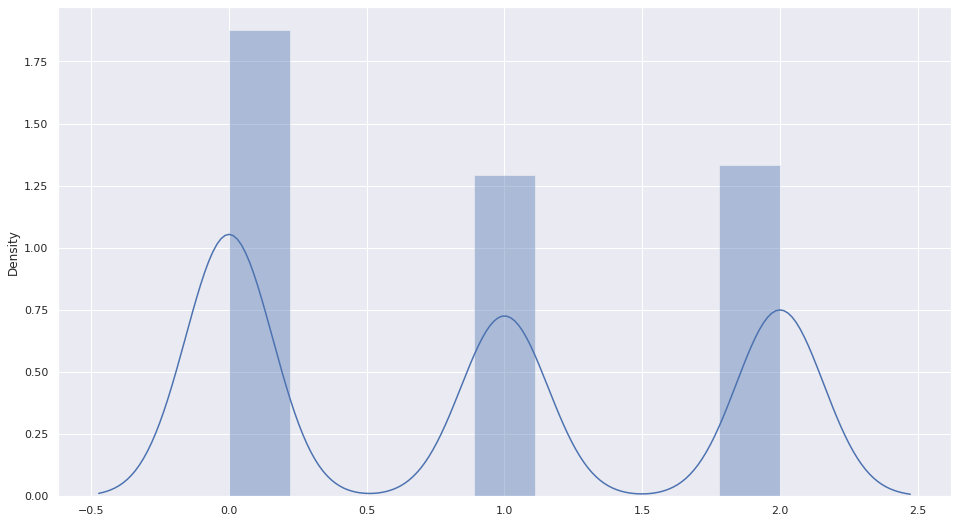

In [59]:
#Data distribution based on diagnosis vs. age
sns.set(rc={"figure.figsize":(16, 9)})
sns.distplot(data[['Case_Control', 'age_group']])

In [60]:
df = data[['code_D11_2nd', 'abdominal_pain_frequency', 'PR_score', 'code_D11_1st', 'code_T08_2nd', 'code_T03_2nd', 'code_T08_1st', 'code_D16_2nd', 'abdominal_pain', 'code_T03_1st', 'Case_Control', 'abd_tend_score', 'haemoglobin_3_categories', 'code_D16_1st', 'code_D12_2nd', 'code_D12_1st', 'age_group' ]]

In [61]:
#Symptoms by Age
data.groupby('age_group')[['code_D11_2nd', 'abdominal_pain_frequency', 'PR_score', 'code_D11_1st', 'code_T08_2nd', 'code_T03_2nd', 'code_T08_1st', 'code_D16_2nd', 'abdominal_pain', 'code_T03_1st', 'Case_Control', 'abd_tend_score', 'haemoglobin_3_categories', 'code_D16_1st', 'code_D12_2nd', 'code_D12_1st', 'age_group'  ]].mean().T.plot_bokeh(figsize=(12,8))

Figure(id='2755', ...)

In [62]:
display(HTML('<p><h3><center>Symptoms by Age</center></h3></p>'))


<AxesSubplot:>

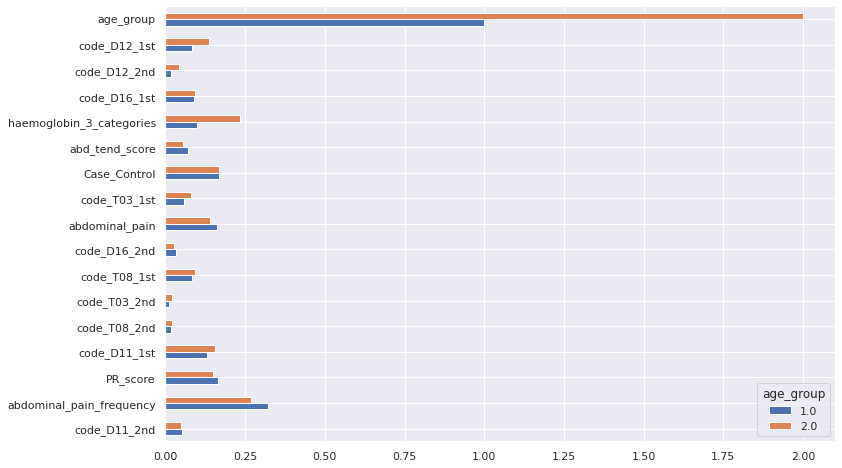

In [63]:
data.groupby('age_group')[['code_D11_2nd', 'abdominal_pain_frequency', 'PR_score', 'code_D11_1st', 'code_T08_2nd', 'code_T03_2nd', 'code_T08_1st', 'code_D16_2nd', 'abdominal_pain', 'code_T03_1st', 'Case_Control', 'abd_tend_score', 'haemoglobin_3_categories', 'code_D16_1st', 'code_D12_2nd', 'code_D12_1st', 'age_group'  ]].mean().T.plot(kind='barh', figsize=(12,8))

In [64]:
display(HTML('<p><h3><center>Pair plots for Top 20 Features</center></h3></p>'))


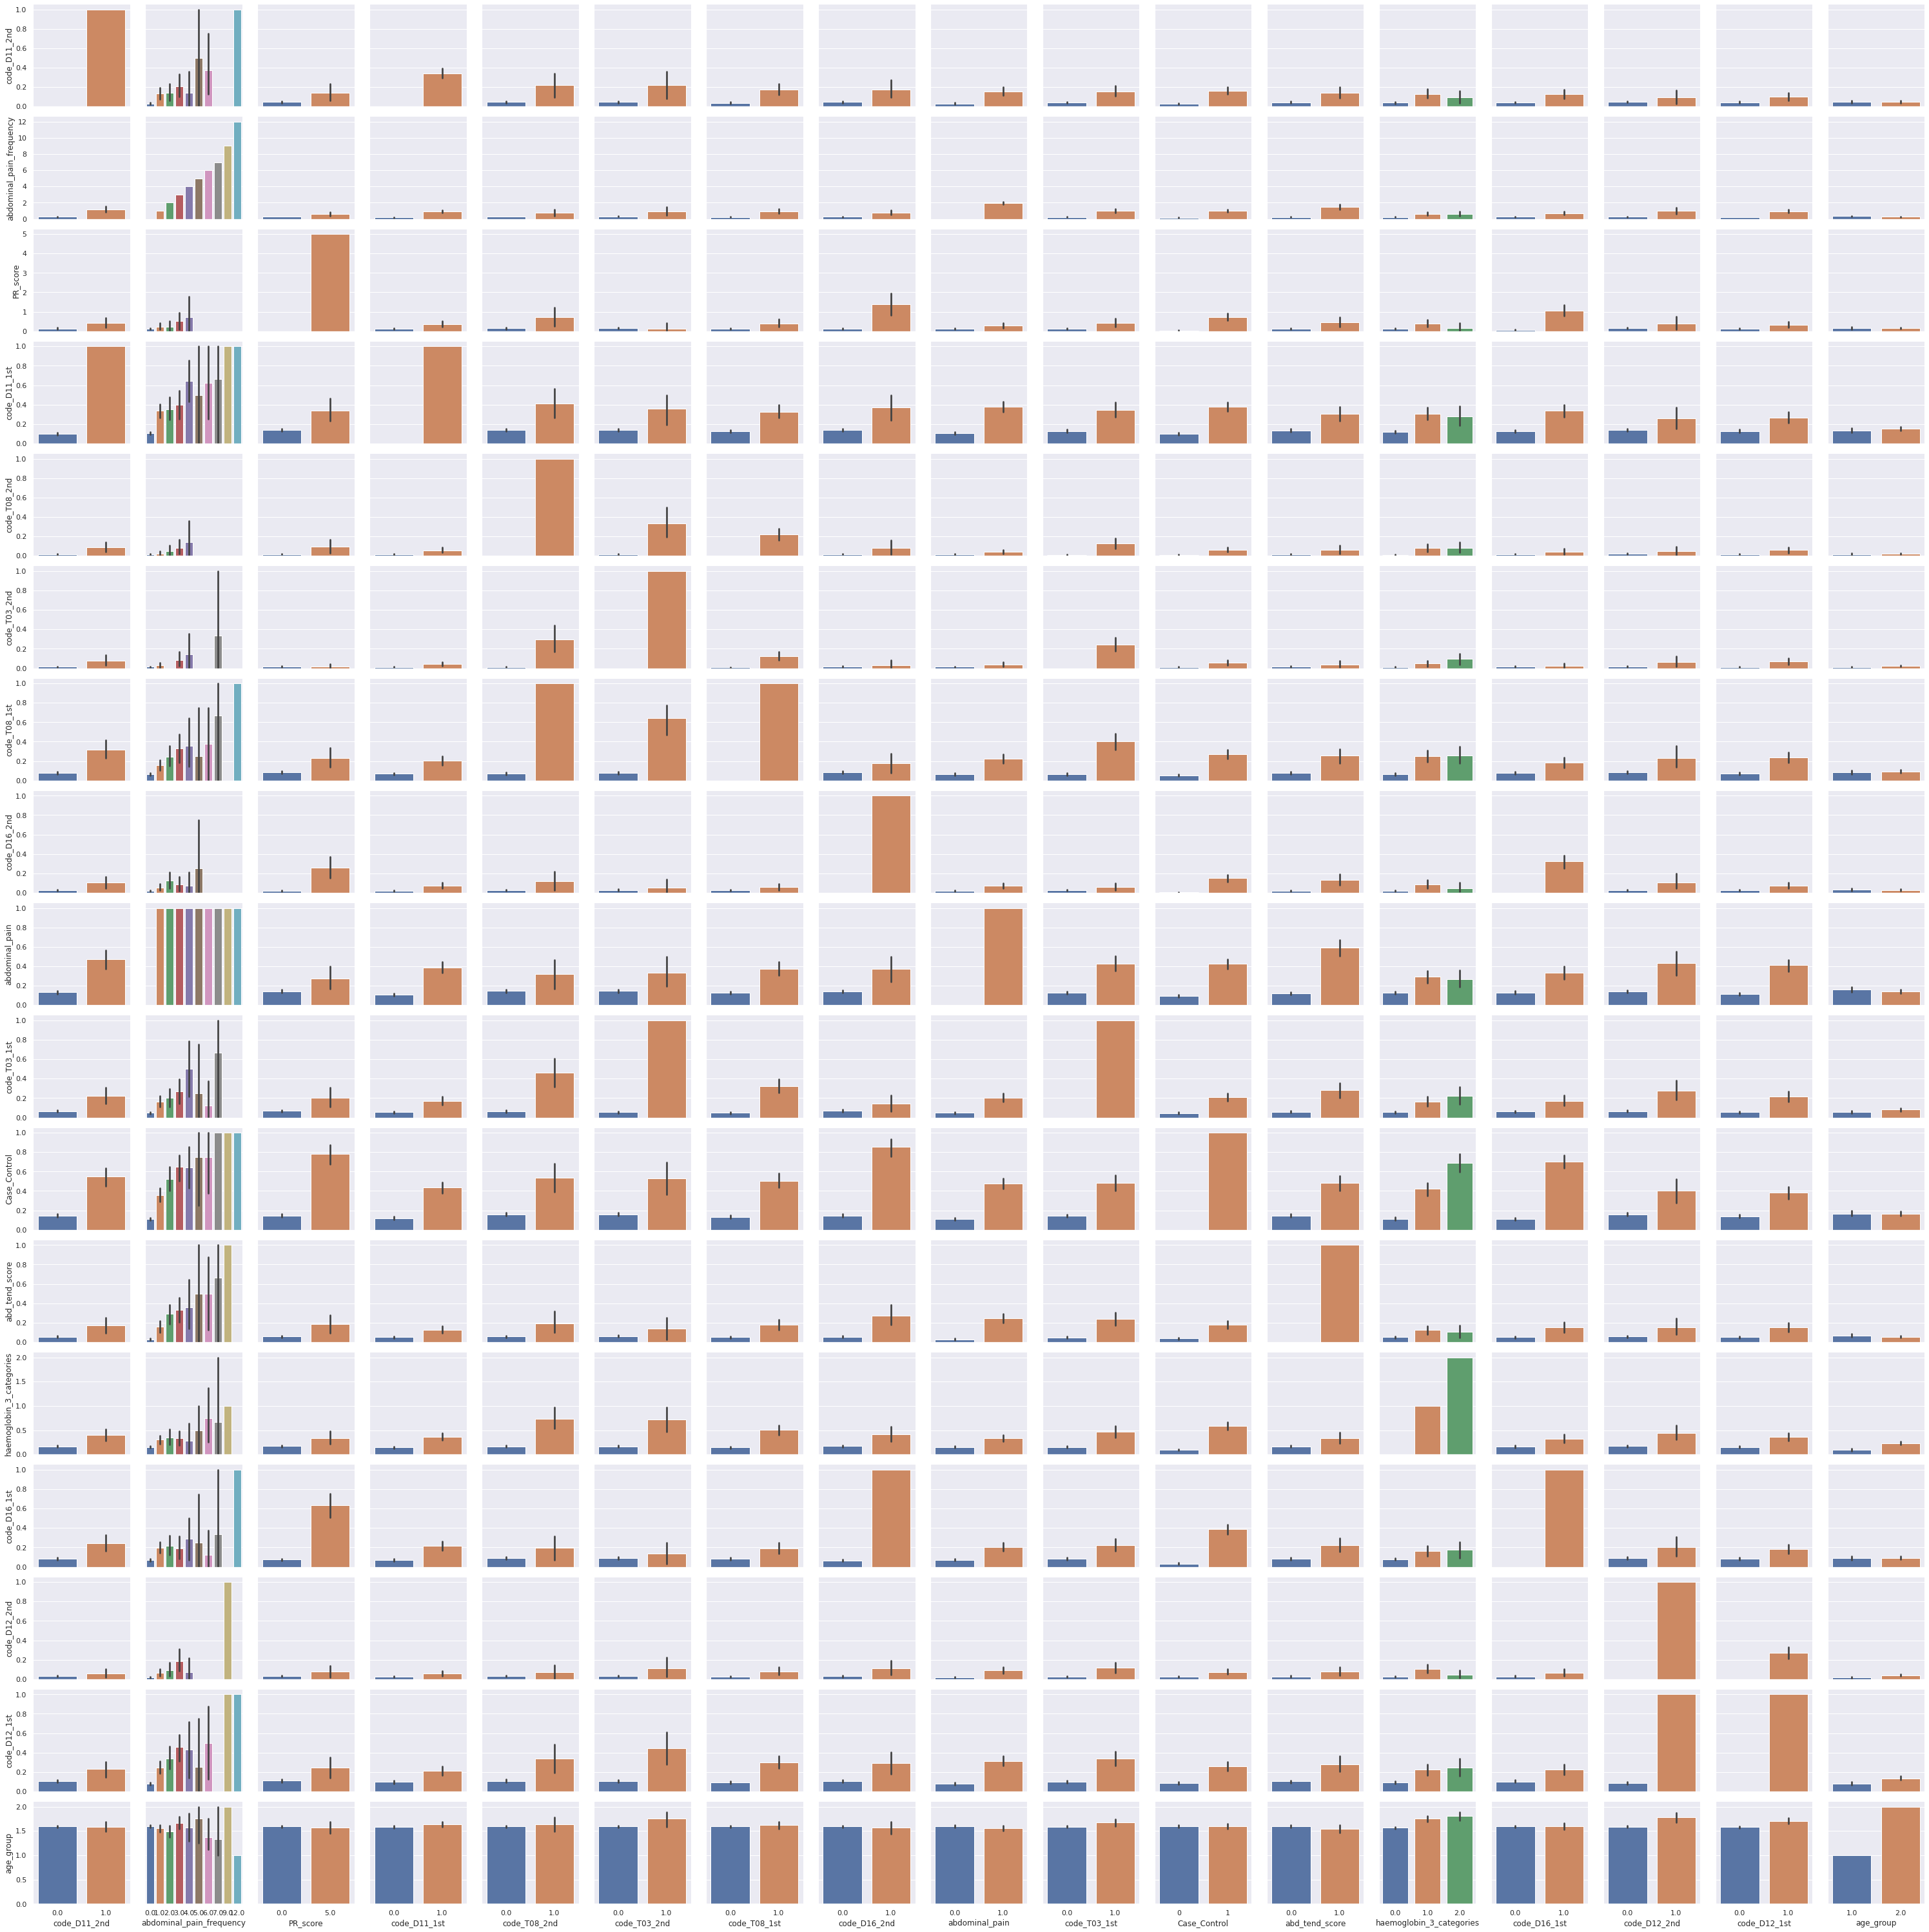

In [65]:
g = sns.PairGrid(df)
g.map(sns.barplot)

In [66]:
display(HTML('<p><h3><center>Top 20 Features by Barplot</center></h3></p>'))


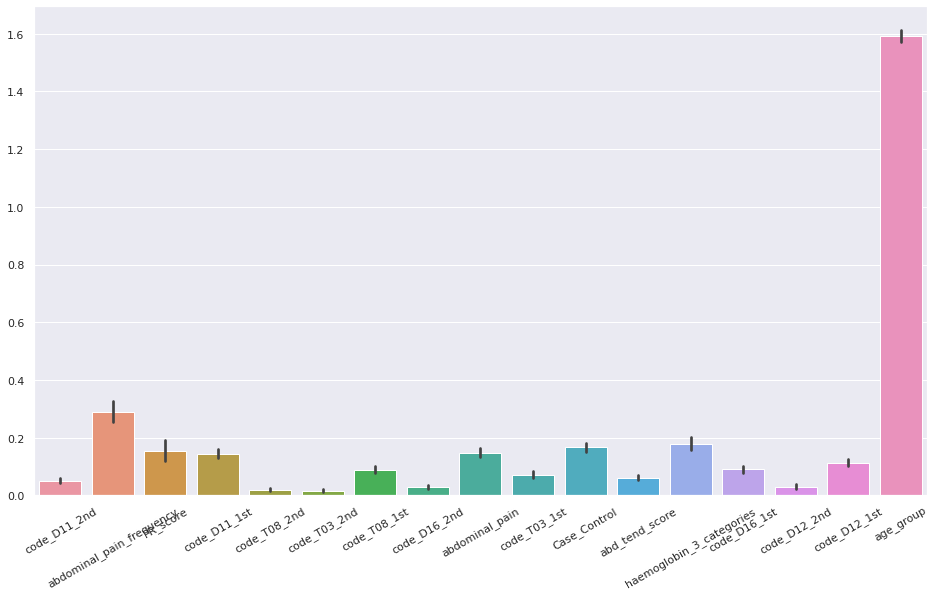

In [67]:
g = sns.barplot(data=df)
g.set_xticklabels(
    labels=['code_D11_2nd', 'abdominal_pain_frequency', 'PR_score', 'code_D11_1st', 'code_T08_2nd', 'code_T03_2nd', 'code_T08_1st', 'code_D16_2nd', 'abdominal_pain', 'code_T03_1st', 'Case_Control', 'abd_tend_score', 'haemoglobin_3_categories', 'code_D16_1st', 'code_D12_2nd', 'code_D12_1st', 'age_group' ], rotation=30)
# Show the plot
plt.show()

In [68]:
display(HTML('<p><h3><center>Distribution vs. Kernal Density</center></h3></p>'))


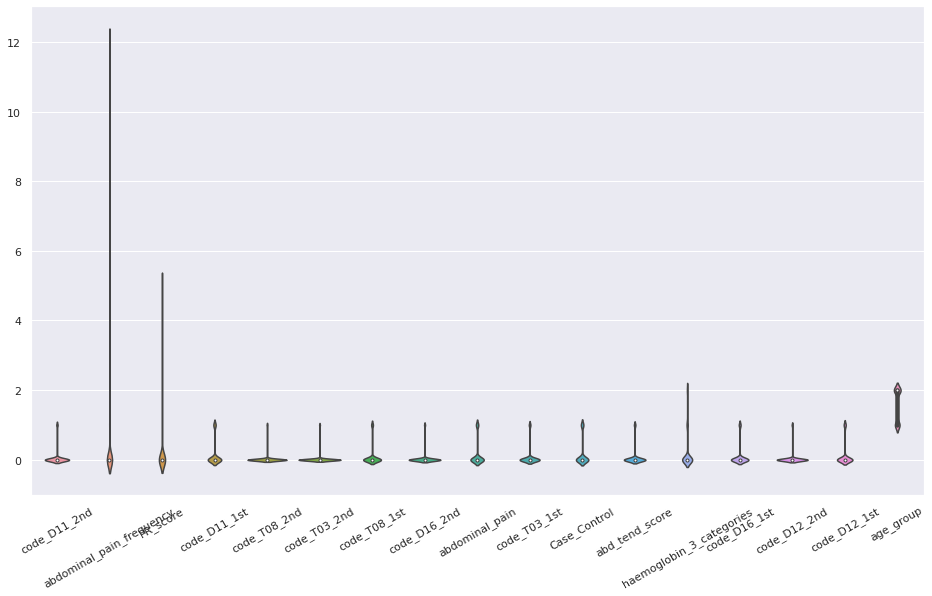

In [69]:
#distribution vs. density
g = sns.violinplot(data=df)
g.set_xticklabels(
    labels=['code_D11_2nd', 'abdominal_pain_frequency', 'PR_score', 'code_D11_1st', 'code_T08_2nd', 'code_T03_2nd', 'code_T08_1st', 'code_D16_2nd', 'abdominal_pain', 'code_T03_1st', 'Case_Control', 'abd_tend_score', 'haemoglobin_3_categories', 'code_D16_1st', 'code_D12_2nd', 'code_D12_1st', 'age_group' ], rotation=30)
# Show the plot
plt.show()

In [70]:
display(HTML('<p><h3><center>Kernal Density</center></h3></p>'))


/tmp/ipykernel_10357/892615552.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(


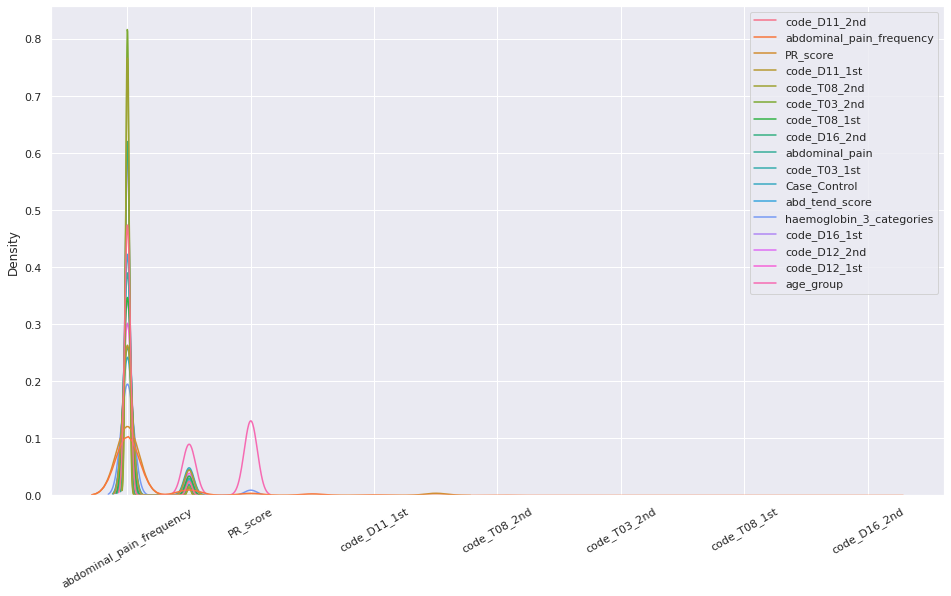

In [71]:
#Kernal Density
g = sns.kdeplot(data=df)
g.set_xticklabels(
    labels=['code_D11_2nd', 'abdominal_pain_frequency', 'PR_score', 'code_D11_1st', 'code_T08_2nd', 'code_T03_2nd', 'code_T08_1st', 'code_D16_2nd', 'abdominal_pain', 'code_T03_1st', 'Case_Control', 'abd_tend_score', 'haemoglobin_3_categories', 'code_D16_1st', 'code_D12_2nd', 'code_D12_1st', 'age_group' ], rotation=30)
# Show the plot
plt.show()